In [7]:
!pip install nltk

# For Preprocessing NLP Data
- lowering the format
- tokenization
- remove stop words
- steming / lemitization
- spell correction

In [8]:
pip install autocorrect==2.4.0 


In [9]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from autocorrect import Speller
spell=Speller()
from tqdm import tqdm
import re

In [10]:
from google.colab import files
uploaded = files.upload()

In [11]:
data=pd.read_csv(r"spam.csv")

In [12]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [13]:
data.rename(columns={'v1':'labels','v2':'messages'},inplace=True)

In [14]:
data.head()

,labels,messages,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [16]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Visualizing the Spam and Ham words


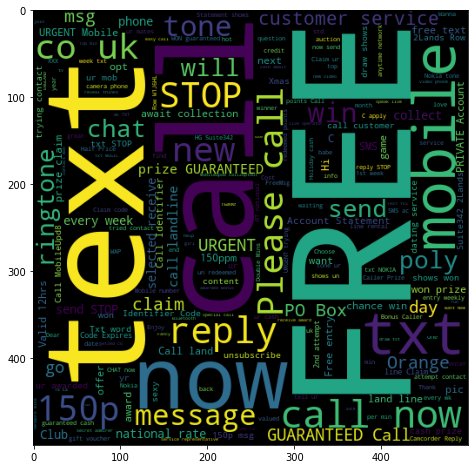

In [17]:
spam_words= ' '.join(list(data[data['labels']=='spam']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

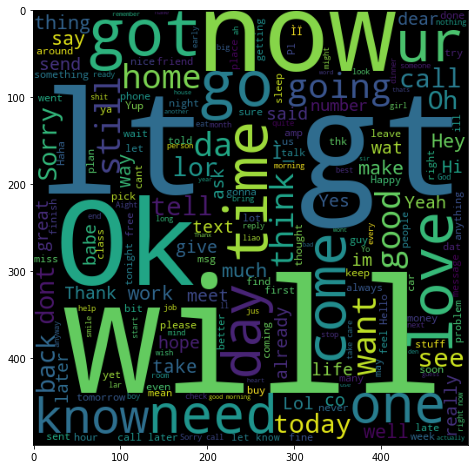

In [18]:
spam_words= ' '.join(list(data[data['labels']=='ham']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()



# Preprocessing the Data

In [19]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
 
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
# Encoding our Labels
data['labels']=data['labels'].apply(lambda x: 1 if x=='spam' else 0)

In [24]:
# preprocessing the Messages
new_data=[]

for i in range(data.shape[0]):
    lines=data.iloc[i,1]
    # removing non alphabatic characters
    lines= re.sub('[^A-Za-z]',' ',lines)
    # lowering the every word
    lines=lines.lower()
    
    # tokenization
    tokenized_lines=word_tokenize(lines)
    
    # removing stop words ,stemming and spell correction
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
            
    final_lines=' '.join(processed_lines)
    new_data.append(final_lines)

In [25]:
new_data

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

In [26]:
len(new_data)

5572

In [27]:
Y=data['labels']
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

In [28]:
Y.value_counts()

0    4825
1     747
Name: labels, dtype: int64

# Splitting the data into training and testing

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,Y,test_size=0.25)

In [30]:
X_train

['cool text',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'contract nokia video camera phone call call cost ppm ave call min vari mobil close post bcm lon wc n xx',
 'eye philosophy',
 'oh love soon good hear omg miss much today sorry problem provide thank thing',
 'frees award free mini digit camera reply snap collect prize quizclub opt stop p wk sp rm ph',
 'someone year lt gt toyota came like mr olayiwola mileage lt gt k clean need know much sell rail dough soon land sell holly back',
 'havent plan buy later check already lio got show e afternoon u finish work already',
 'world jammu',
 'sm service include text credit pl goto www com net login unsubscrib stop extra charg help po box ip',
 'prize go not custom c www c biz p min polo ltd suit london w j hl pleas call back bus',
 'urgent mobil number award prize guarantee call land line claim valid hr',
 'e best ur drive tmr',
 'last chance claim ur worth discount voucher text ye savamob member o

In [31]:
Y_train

4029    0
3227    1
432     1
3553    0
2092    0
       ..
3762    0
5212    0
2983    0
284     0
2123    1
Name: labels, Length: 4179, dtype: int64

In [32]:
Y_test

4055    0
1954    0
296     0
1079    0
4394    0
       ..
4891    0
1906    0
4366    0
1865    0
923     0
Name: labels, Length: 1393, dtype: int64

# Vectorization using Bag of Words

In [33]:
from sklearn.feature_extraction.text import CountVectorizer 
#tf_idf
matrix=CountVectorizer()

In [34]:
X_train_vect=matrix.fit_transform(X_train).toarray()
X_test_vect=matrix.transform(X_test).toarray()

In [35]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
X_test_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
Y_train

4029    0
3227    1
432     1
3553    0
2092    0
       ..
3762    0
5212    0
2983    0
284     0
2123    1
Name: labels, Length: 4179, dtype: int64

In [38]:
Y_test

4055    0
1954    0
296     0
1079    0
4394    0
       ..
4891    0
1906    0
4366    0
1865    0
923     0
Name: labels, Length: 1393, dtype: int64

**Lets train our Model - Naive Bayes**

In [39]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [40]:
model.fit(X_train_vect,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
model.classes_

array([0, 1])

In [42]:
Y_pred=model.predict(X_test_vect)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [44]:
accuracy_score(Y_test,Y_pred) * 100

84.49389806173726

In [45]:
confusion_matrix(Y_test,Y_pred)

array([[997, 185],
       [ 31, 180]])